# Import data (features)

In [2]:
import pandas as pd
import numpy as np

# Specify the path to the pickle file
data_file_path = '../Dataset/Dementia_paper_dataset_data.pkl'
info_file_path = '../Dataset/Dementia_paper_dataset_info.pkl'

# Open the pickle file in read mode
with open(data_file_path, 'rb') as file:
    # Load the data from the pickle file
    data = pd.read_pickle(file)

# Open the pickle file in read mode
with open(info_file_path, 'rb') as file:
    # Load the data from the pickle file
    info = pd.read_pickle(file)

# Display the first few rows of the data
data['train'].head()

,ID,Task,Coh_delta_T5-T3,Coh_delta_T5-F7,Coh_delta_T5-O1,Coh_delta_T5-Cp3,Coh_delta_T5-Fc3,Coh_delta_T5-Fp1,Coh_delta_T5-Fcz,Coh_delta_T5-Cpz,...,Corr_Cp4-O2,Corr_Cp4-F8,Corr_Cp4-T4,Corr_Cp4-T6,Corr_O2-F8,Corr_O2-T4,Corr_O2-T6,Corr_F8-T4,Corr_F8-T6,Corr_T4-T6
0,NTUH_0004,Rest,0.739369,0.701256,0.759699,0.741979,0.482286,0.165846,0.110406,0.291415,...,0.765194,0.567678,0.708985,0.803361,0.404576,0.661505,0.919683,0.717551,0.520095,0.783182
1,CGMHKL_0002,Rest,0.814006,0.304687,0.923202,0.659374,0.235388,0.263912,0.233530,0.494247,...,0.594284,0.311152,0.518404,0.688676,0.192620,0.477090,0.762633,0.449235,0.383965,0.661592
2,NTUH_0011,Rest,0.756742,0.273296,0.838798,0.849737,0.255621,0.145847,0.172226,0.420560,...,0.648830,0.432738,0.592082,0.750562,0.244982,0.558273,0.891249,0.643338,0.400314,0.701446
3,CGMHKL_0005,Rest,0.755170,0.332022,0.721507,0.514757,0.138277,0.259687,0.193953,0.307590,...,0.614496,0.296134,0.239646,0.736570,0.284022,0.345613,0.818268,0.302792,0.371725,0.428486
4,CGMHKL_0004,Rest,0.651956,0.284282,0.611058,0.573420,0.240884,0.169931,0.155174,0.229636,...,0.347948,0.311138,0.429988,0.502850,0.242461,0.377395,0.727081,0.626247,0.420851,0.575280


In [3]:
import numpy as np
# Dataframe to numpy array in each dictionary
data_ndarrays = {}
for key, value in data.items():
    # Detect if the key is 'Info' and skip it
    if key != 'Info':
        # Drop the 'ID' and 'Task' columns if they exist
        if 'ID' in data[key].columns:
            data[key].drop('ID', axis=1, inplace=True)
        if 'Task' in data[key].columns:
            data[key].drop('Task', axis=1, inplace=True)  
        data_ndarrays[key] = value.values
    else:
        data_ndarrays[key] = value

label_ndarrays = {}
label_ndarrays_CInonCI = {}
for key, value in info.items():
    if key != 'Info':
        label_ndarrays[key] = value['Label'].values
        label_ndarrays_CInonCI[key] = value['Label'].values
    else:
        label_ndarrays[key] = value
        label_ndarrays_CInonCI[key] = value

# Replace 2 with 1 in label_ndarrays
label_ndarrays_CInonCI = {key: np.where(value == 2, 1, value) for key, value in label_ndarrays_CInonCI.items()}

print(label_ndarrays['train'])
label_ndarrays_CInonCI['train']



[1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 2 1 1 2 1 1 1
 2 2 2 0 1 2 2 1 1 0 1 0 0 0 0 2 0 0 1 0 1 0 0 0 0 1 2 1 0 1 0 0 2 2 1 0 2
 2 0 2 2 0 1 1 0 0 0 0 2 0 2 0 1 2 0 2 1 1 1 0 1 2 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 2 2 0 0 0 1 0 2 0 0 2 0 1 0 0 1 0 2 0 1 1 1 0 0 0 0 2
 2 0 0 1 1]


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

## Feature selection (filter) - Fisher's Criterion

In [4]:
# data organizing and feature selection(fisher score)
import os
from feature_related import feature_selection as f_selection  # Import the feature_selection module

# Train & Valid data organizing
data_train_valid = np.concatenate([data_ndarrays['train'], data_ndarrays['valid']], axis=0)
label_train_valid = np.concatenate([label_ndarrays_CInonCI['train'], label_ndarrays_CInonCI['valid']], axis=0)

# Independent test data organizing
data_test = data_ndarrays['test']
label_test = label_ndarrays_CInonCI['test']

# Feature selection - filter_based
f_selection = f_selection()
fisher_scores = f_selection.fisher_score(data_train_valid, label_train_valid)
fisher_idx = np.argsort(fisher_scores)[::-1] # sort in descending order

# Dimension reduction plot

idx: 251
test score: 0.7216494845360825
(6, 10, 21, 24, 28, 30, 37, 38, 49, 63, 64, 65, 67, 81, 82, 91, 95, 102, 105, 110, 113, 121, 132, 137, 141, 143, 144, 153, 156, 160, 161, 169, 170, 175, 179, 185, 188, 191, 195, 204, 217, 219, 225, 228, 243, 245, 246, 247, 253, 257, 258, 259, 263, 269, 283, 288, 302)
[  840 12436  5372  8845  5426  8562 12355  4495  4564   701  7531  8696
  5410 12426  4101 12412 12500  8647  8717  4104  8611   998  8766  1063
  8844  2879 11068 12221  3798  5684  3785   511  6932  5425  7156  9441
 11007 11474  3694  5334 11147 11399  2499  3288  4699  5910  7822  2872
  5563  8722 12785  6577  5281  3887  2693 11104  4847]


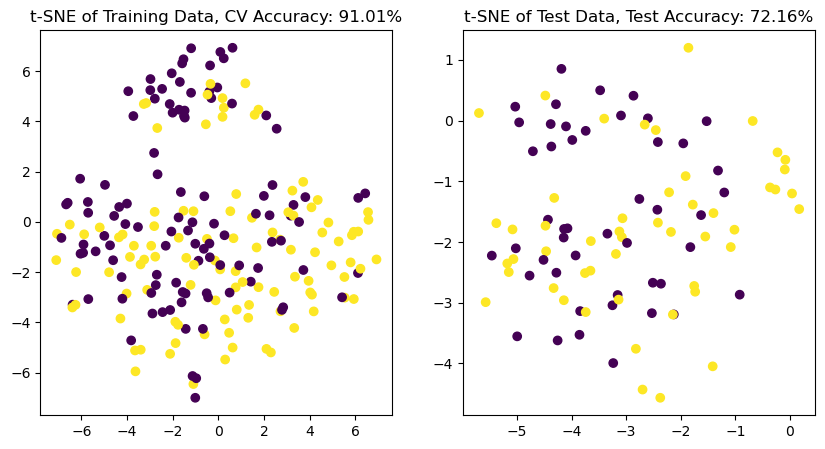

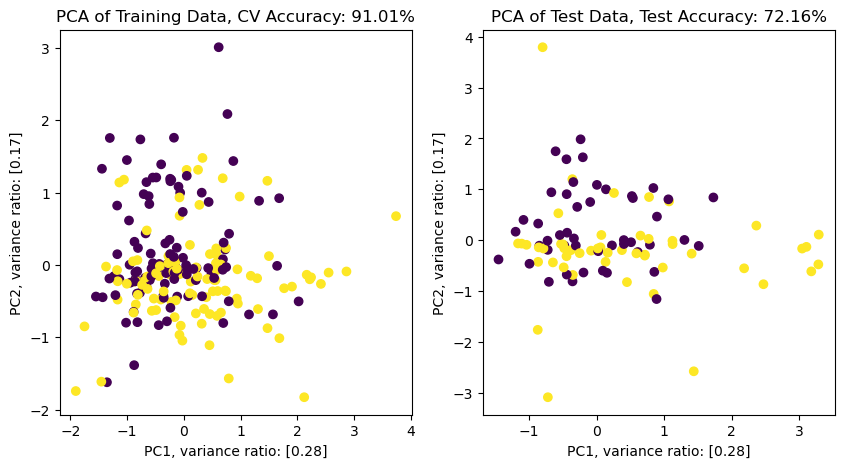

In [5]:
import pandas as pd
import os

result_folder = "../Results/Classification/LDA/5Fold_test/RFECV-maxDim=500/SBS"
df_accCV = pd.read_csv(os.path.join(result_folder, 'df_accCV.csv'))
fisher_idx = pd.read_csv(os.path.join(result_folder, 'fisher_idx_series.csv'))['fisher_idx'].values

df_accCV.columns

test_score = df_accCV.test_score

import numpy as np
import matplotlib.pyplot as plt

max_test_idx = np.argmax(df_accCV.test_score)
print('idx:',max_test_idx)
print('test score:',test_score[max_test_idx])

# convert the string to tuple
import ast
feature_idx = ast.literal_eval(df_accCV.feature_idx.iloc[max_test_idx])
print(feature_idx)


plot_idx = fisher_idx[[feature_idx]].flatten()
print(plot_idx)

from sklearn.manifold import TSNE
# dimension reduction


tsne = TSNE(perplexity=50, early_exaggeration=1)
X_embedded_train_valid = tsne.fit_transform(data_train_valid[:,plot_idx])
X_embedded_test = tsne.fit_transform(data_test[:,plot_idx])

# plot the data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_embedded_train_valid[:,0], X_embedded_train_valid[:,1], c=label_train_valid, cmap='viridis')
plt.title(f't-SNE of Training Data, CV Accuracy: {round(df_accCV.avg_score.iloc[max_test_idx],4):.2%}')
plt.subplot(1,2,2)
plt.scatter(X_embedded_test[:,0], X_embedded_test[:,1], c=label_test, cmap='viridis')
plt.title(f't-SNE of Test Data, Test Accuracy: {round(df_accCV.test_score.iloc[max_test_idx],4):.2%}')
plt.show()



from sklearn.decomposition import PCA
# dimension reduction

pca = PCA(n_components=2)
X_embedded_train_valid = pca.fit_transform(data_train_valid[:,plot_idx])

# plot the data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_embedded_train_valid[:,0], X_embedded_train_valid[:,1], c=label_train_valid, cmap='viridis')
plt.title(f'PCA of Training Data, CV Accuracy: {round(df_accCV.avg_score.iloc[max_test_idx],4):.2%}')
plt.xlabel(f'PC1, variance ratio: [{round(pca.explained_variance_ratio_[0],2)}]')
plt.ylabel(f'PC2, variance ratio: [{round(pca.explained_variance_ratio_[1],2)}]')

X_embedded_test = pca.transform(data_test[:,plot_idx])
plt.subplot(1,2,2)
plt.scatter(X_embedded_test[:,0], X_embedded_test[:,1], c=label_test, cmap='viridis')
plt.title(f'PCA of Test Data, Test Accuracy: {round(df_accCV.test_score.iloc[max_test_idx],4):.2%}')
plt.xlabel(f'PC1, variance ratio: [{round(pca.explained_variance_ratio_[0],2)}]')
plt.ylabel(f'PC2, variance ratio: [{round(pca.explained_variance_ratio_[1],2)}]')
plt.show()

# Train a new model based on chosen features

[0.5, 3.5199943560623286, 24.780720533421302, 174.45599283360173, 1228.1682203110563, 8646.290407580067, 60869.78687111537, 428522.61248208594, 3016794.3547640545, 21238198.204340335, 149516675.62442216, 1052595708.6703357, 7410261907.47002, 52168160182.47627, 367263258816.944, 2585529196449.4033, 18202096357872.53, 128142552896427.98, 902122125933690.0, 6350929583531076.0, 4.4710472579557336e+16, 3.147612222738426e+17, 2.2159154518224133e+18, 1.56000197678524e+19, 1.0982396307460242e+20, 7.731594603659964e+20, 5.443033873649005e+21, 3.831889703020116e+22, 2.6976460255368324e+23, 1.8991397569087247e+24, 1.336992245138459e+25, 9.412410313972954e+25, 6.626326236425529e+26, 4.664926190729121e+27, 3.2841027725627686e+28, 2.3120046448299184e+29, 1.627648660198241e+30, 1.1458628195100437e+31, 8.066861314994044e+31, 5.679061259983314e+32, 3.9980527165746966e+33, 2.8146245995165187e+34, 1.9814925409464682e+35, 1.394968512142234e+36, 9.820562579250658e+36, 6.913664970463846e+37, 4.8672123351477

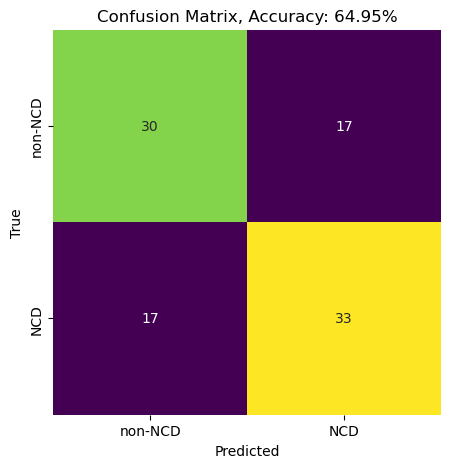

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for GridSearchCV
gamma_range = np.linspace(0, 10**3, 51) #-100,-90,...,90,100
gamma_range = 1.05**gamma_range # 1.05^-100,1.05^-95,...,1.05^95,1.05^100
gamma_range = 1 / 2*(np.square(gamma_range))  # gamma = 1 / (2*sigma)^2, based on the SVC documentation
gamma_range = gamma_range.tolist()
C_range = np.linspace(0.01, 10**6, 501)/10**4 
print(gamma_range)
print(C_range)

# Create multiple parameter set based on all posible combination of the parameter grids
param_grid = [{'C': C_range, 'gamma':[0], 'kernel': ['linear']},
              {'C': C_range, 'gamma': gamma_range, 'kernel': ['rbf']},
              {'C': C_range, 'degree': [2, 3, 4, 6, 8, 10], 'kernel': ['poly'], }]
param_grid_list = list(ParameterGrid(param_grid))

# Create a dictionary to store the results
results = {}

# Loop through each parameter set
for i, param in enumerate(param_grid_list):
    # Print the current parameter set
    print(f'Parameter set {i+1}/{len(param_grid_list)}: {param}')
    
    # Create a SVC model
    model = SVC(**param, random_state=42)
    
    # Fit the model on the training data
    model.fit(data_train_valid[:,plot_idx], label_train_valid)
    
    # Predict the labels of the test data
    pred = model.predict(data_test[:,plot_idx])
    
    # Calculate the accuracy of the model
    acc = np.mean(pred == label_test)
    print(f'Accuracy: {acc:.2%}')

    # Store the accuracy in the results dictionary
    results[i] = {'param': param, 'acc': acc}

# Find the parameter set with the highest accuracy
best_param = max(results, key=lambda x: results[x]['acc'])
best_acc = results[best_param]['acc']
best_param = results[best_param]['param']
print(f'Best parameter set: {best_param}')
print(f'Best accuracy: {best_acc:.2%}')

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Create a SVC model
model = SVC(**best_param, random_state=42)

# Fit the model on the training data
model.fit(data_train_valid[:,plot_idx], label_train_valid)

# Predict the labels of the test data
pred = model.predict(data_test[:,plot_idx])

# Calculate the accuracy of the model
acc = np.mean(pred == label_test)
print(f'Accuracy: {acc:.2%}')

# Calculate the confusion matrix
cm = confusion_matrix(label_test, pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, xticklabels=['non-NCD', 'NCD'], yticklabels=['non-NCD', 'NCD'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix, Accuracy: {acc:.2%}')
plt.show()



In [127]:
class RFE_pseudo_sample():
    def __init__(self, n_pseudo_samples, fitted_estimator, n_features_to_select=0,  c=1.4826):
        self.n_features_to_select = n_features_to_select
        self.fitted_estimator = fitted_estimator
        self.params = fitted_estimator.get_params()
        self.n_pseudo_samples = n_pseudo_samples
        self.discarded_features_idx = list()
        self.remain_feature_idx = list()
        self.c = c

    def create_pseudo_samples(self, X):
        n_features = X.shape[1]
        
        # Create a list to store the pseudo samples
        pseudo_samples = []
        
        # Calculate the quantiles of all features
        quantiles = np.array([i/self.n_pseudo_samples for i in range(self.n_pseudo_samples)]) # create quantiles
        quantilized_features = np.quantile(X, quantiles, axis=0) # calculate quantiles of each feature
        
        # Calculate the median of all features
        median_features = np.median(X, axis=0)

        # Loop through each feature
        for i in range(n_features):

            # Create a copy of the data
            X_pseudo = np.array([median_features.copy() for i in range(self.n_pseudo_samples)])
            
            # convert specific feature to quantilized value
            X_pseudo[:,i] = quantilized_features[:,i]
            
            # Append the pseudo sample to the list
            pseudo_samples.append(X_pseudo)
        
        # Convert the list to a numpy array
        pseudo_samples = np.array(pseudo_samples)
        
        self.pseudo_samples_ = pseudo_samples
        return self.pseudo_samples_
    
    def iteratly_fit_remain_feature(self, pseudo_samples, X, y):
        iteratly_remain_feature_idx = self.remain_feature_idx.copy()    

        # fit the model on the remaining features
        estimator = SVC(**self.params)
        estimator.fit(X[:, iteratly_remain_feature_idx], y)
        print('iteratly_remain_feature_idx:',iteratly_remain_feature_idx)

        # Calculate the feature importance of the pseudo samples
        MAD = np.zeros(len(self.remain_feature_idx))
        for idx, feature_idx in enumerate(self.remain_feature_idx):
            # Access the decision values of the pseudo samples
            print(pseudo_samples.shape)
            tmp = pseudo_samples[feature_idx, :, :]
            D = estimator.decision_function(tmp[:, iteratly_remain_feature_idx])
            print(tmp[:, iteratly_remain_feature_idx].shape)
            
            # Calculate the median absolute deviation (MAD)
            MAD[idx] = np.median(np.absolute(D - np.median(D)))*self.c
        
        # Sort the feature importance
        print('MAD:',MAD)
        discard_idx = np.argmin(MAD)
        print('discard_idx:',discard_idx)
        self.discarded_features_idx.append(self.remain_feature_idx[discard_idx]) 
        self.remain_feature_idx.pop(discard_idx) # Remove the worst feature from the remain_feature_idx
    
        
    def fit(self, X, y):
        self.remain_feature_idx = list(range(X.shape[1]))
        
        # Create pseudo samples
        pseudo_samples = self.create_pseudo_samples(X)

        # Loop through each iteration
        for i in range(X.shape[1] - self.n_features_to_select):
            # Fit the model on the remaining features
            self.iteratly_fit_remain_feature(pseudo_samples, X, y)
        
        self.ranked_features_ascending_ = self.discarded_features_idx.copy()
        self.ranked_features_ascending_ += self.remain_feature_idx
        self.ranked_features_ascending_ = self.ranked_features_ascending_[::-1]

In [128]:
rfe_ps = RFE_pseudo_sample(n_features_to_select=10, n_pseudo_samples=100, fitted_estimator=model)

pseudo = rfe_ps.create_pseudo_samples(X)
print(pseudo.shape)
a = pseudo[0,:,:]
print(a[:,[1,2,3]].shape)

(10, 100, 10)
(100, 3)


In [129]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1, random_state=42)

gsr = GridSearchCV(SVC(), {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}, cv=5, verbose=1)


# Fit the GridSearchCV on the synthetic dataset
gsr.fit(X, y)

print(gsr.best_score_)

# Create a RFE_pseudo_sample object
rfe_ps = RFE_pseudo_sample(n_features_to_select=5, n_pseudo_samples=100, fitted_estimator=gsr.best_estimator_)

rfe_ps.fit(X, y)

rfe_ps_ranked_features = rfe_ps.ranked_features_ascending_
print(rfe_ps.discarded_features_idx)
print(rfe_ps_ranked_features)
print(rfe_ps.remain_feature_idx)

for i in range(10):
    # feature_idx = rfe_ps_ranked_features[:i+1]
    feature_idx = rfe_ps_ranked_features[i]
    # print(feature_idx)
    gsr.fit(X[:, [feature_idx]], y)
    gsr_score = gsr.best_score_
    print(f'Feature {i+1:3}: Score: {gsr_score:.2%}, {feature_idx}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.95
iteratly_remain_feature_idx: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
(10, 100, 10)
(100, 10)
MAD: [0.05153752 0.03831144 0.09084532 1.44438573 0.05614292 0.20298162
 1.18231586 0.06920602 0.06559933 0.05766714]
discard_idx: 1
iteratly_remain_feature_idx: [0, 2, 3, 4, 5, 6, 7, 8, 9]
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
(10, 100, 10)
(100, 9)
MAD: [0.06051735 0.08578144 1.49719032 0.08766991 0.20021364 1.19429141
 0.07368514 0.06769957 0.03891598]
discard_idx: 8
iteratly_remain_feature_idx: [0, 2, 3, 4, 5, 6, 7, 8]
(10, 100, 10)
(100, 8)
(10, 100, 10)
(100, 8)
(10, 100, 10)
(1